In [1]:
import numpy as np
import matplotlib.pyplot as plt

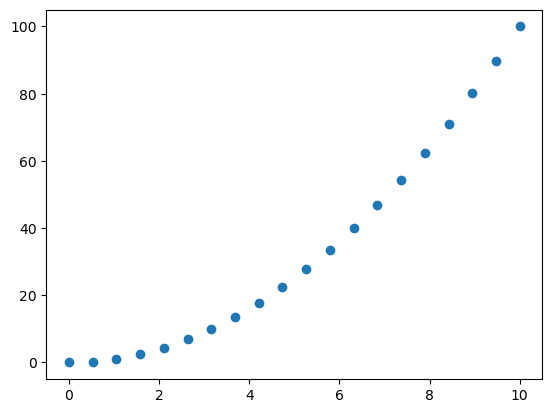

In [2]:
x=np.linspace(0,10,20)
y=x**2
plt.scatter(x,y)

# 1- INTERPOLATION

In [3]:
from scipy.interpolate import interp1d

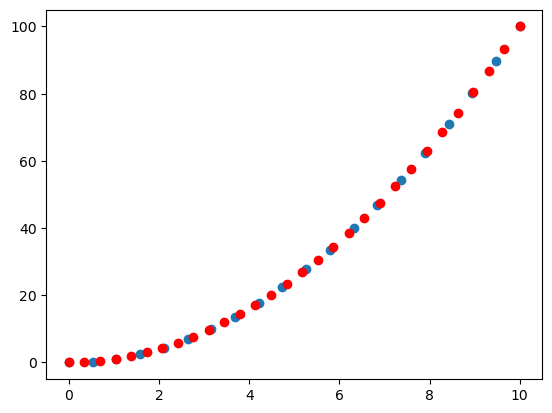

In [4]:
f=interp1d(x,y,kind='linear')

new_x=np.linspace(0,10,30)

result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,color='r')
# Quand on procède a une interpolaion linéaire il faut veiller à ce que cela ne cache pas
# ce qui se passe en réalité
# Les types d'interpolatiion --> Savoir comment les utilisé

# A- Type d'interpolation

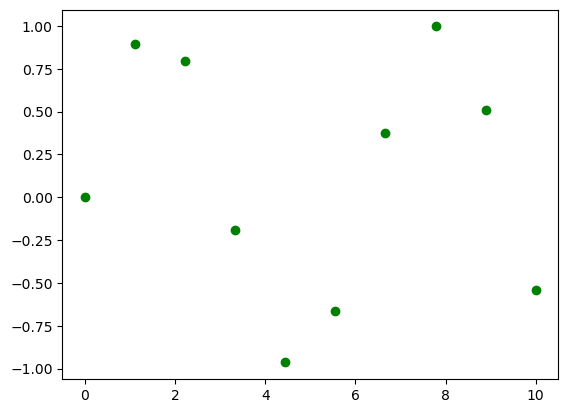

In [5]:

#supposons que notre data set ressemble à ceci
x=np.linspace(0,10,10)
y=np.sin(x)
plt.scatter(x,y,color='g')

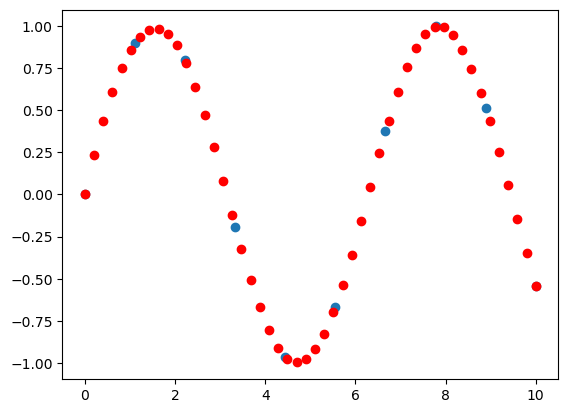

In [6]:
# Ici on va utiliser une interpolation cubique
f=interp1d(x,y,kind='cubic')

new_x=np.linspace(0,10,50)

result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,color='r')

# 2- OPTIMISATION

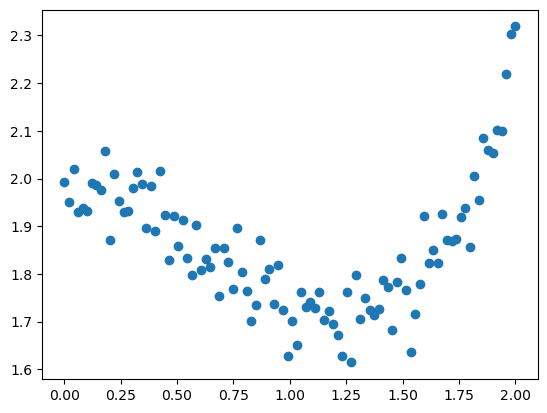

In [7]:
x=np.linspace(0,2,100)
y=1/3*x**3-3/5*x**2+2+np.random.randn(x.shape[0])/20
#optimize.curve_fit(f,x,y)
plt.scatter(x,y)

In [8]:
from scipy import optimize

In [9]:
def f(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

In [10]:
optimize.curve_fit(f,x,y)

(array([ 0.37335252, -0.74409988,  0.13441998,  1.96768168]),
 array([[ 0.00116606, -0.00349817,  0.0027845 , -0.00045238],
        [-0.00349817,  0.01080018, -0.00896481,  0.00155887],
        [ 0.0027845 , -0.00896481,  0.00795503, -0.00156683],
        [-0.00045238,  0.00155887, -0.00156683,  0.00042002]]))

In [11]:
params, param_cov= optimize.curve_fit(f,x,y)

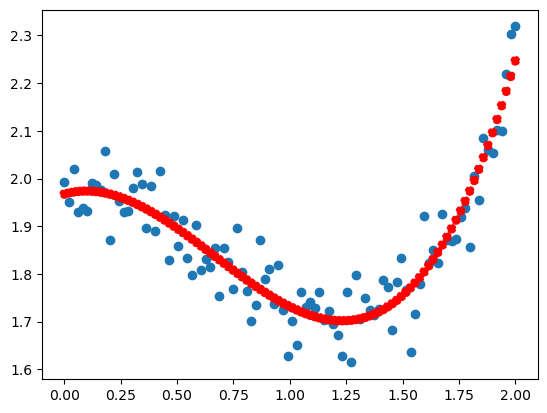

In [12]:
plt.scatter(x,y)
plt.scatter(x,f(x,params[0],params[1],params[2],params[3]), color='red', lw=1,ls='--')

# B- MINIMISATION

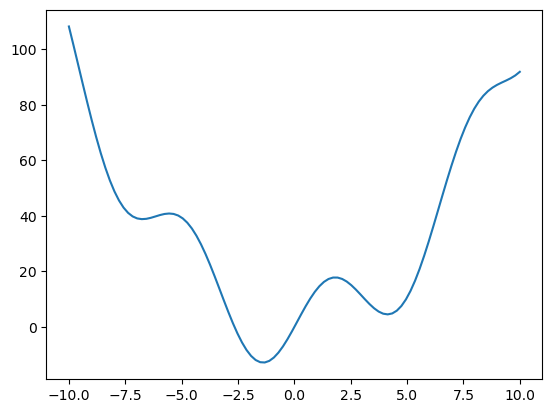

In [13]:
# Elle nous permet de minimiser n'importe quelle fonction
# génère un algorithme de minimisation pour serapprocher vers le premier minimum

def f(x):
    return x**2 +15*np.sin(x)
x=np.linspace(-10,10,100)
plt.plot(x,f(x))

In [14]:
optimize.minimize(f, x0=-5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -12.823616887804414
        x: [-1.385e+00]
      nit: 4
      jac: [ 3.695e-06]
 hess_inv: [[ 5.979e-02]]
     nfev: 18
     njev: 9

In [15]:
x0=-5
result=optimize.minimize(f,x0=x0).x

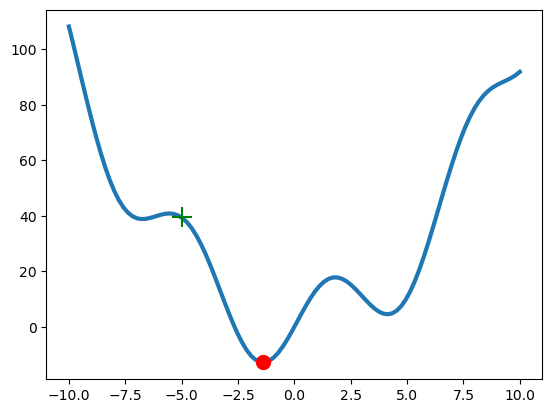

In [16]:
plt.plot(x,f(x),lw=3,zorder=-1)
plt.scatter(result,f(result),s=100,c='r', zorder=1)
plt.scatter(x0,f(x0),s=200,marker='+',c='g', zorder=1)
plt.show()

In [17]:
# Problème d'interpolation linéaire : supposons on possède deux capteurs dont l'une fournis des valeurs chaque secode 
# et l'autre toutes les trois secondes

# TRAITEMENT DU SIGNAL 

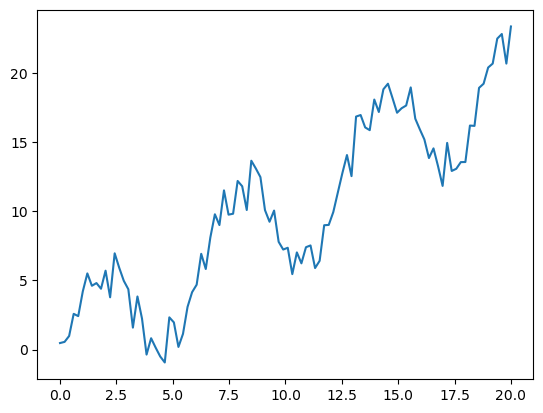

In [18]:
x=np.linspace(0,20,100)
y=x+4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x,y)

In [19]:
# Eliminer toute tendance linéaire dans le signal ci-dessus
from scipy import signal

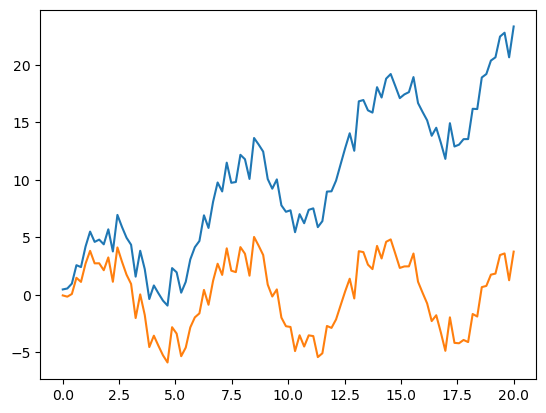

In [20]:
new_y=signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)

# TRANSFORMATION DE FOURRIER 
--> Permet d'extraire et Analyser les fréquences présentes
dans un signal périodique 
En résultat:  un Spectre

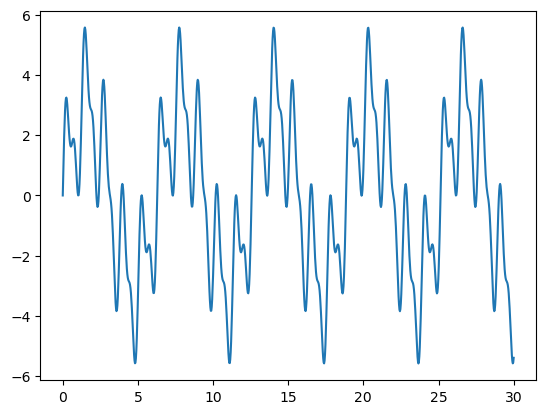

In [21]:
x=np.linspace(0,30,1000)
y=3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)
plt.plot(x,y)

In [22]:
from scipy import fftpack

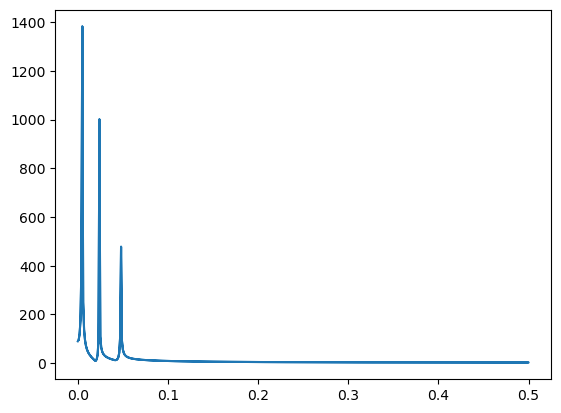

In [23]:
fourier=fftpack.fft(y) # 1
power=np.abs(fourier) # pour filtre le résultat car on aura des valeurs négatives 
# tels que l'amplitude 
frequences=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences) , power)#
# On s'en sert pour filtrer un signal 

In [24]:
# 1ère étape : Faire la transformation de fourier pour produire le spectre de notre signal

# 2ème étape:  Utiiser le boolean indexing pour supprimer dans ce spectre toutes dles valeurs négatives ou inférieures à un certain seuil 

#3ème étape : Utiliser le spectre et appliquer la transformation de fourier inverse pour revnir dans le monde réel

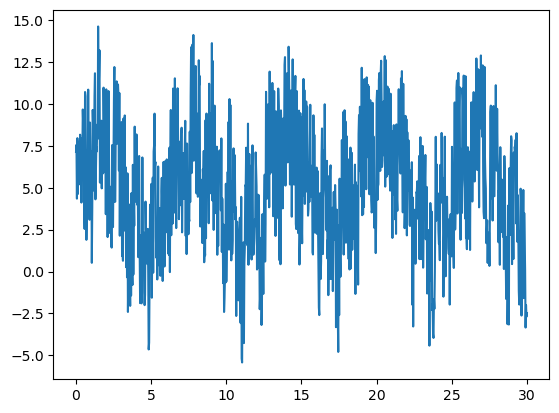

In [25]:
x=np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)

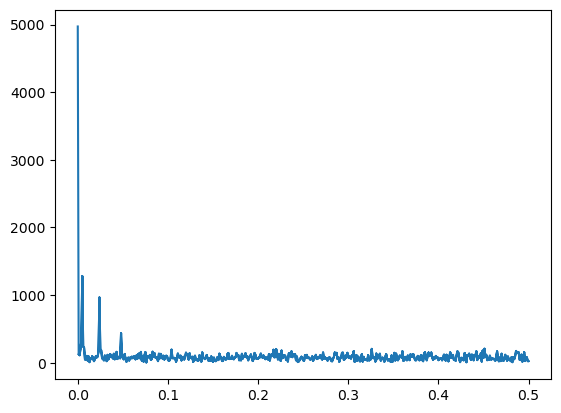

In [26]:
fourier=fftpack.fft(y) 
power=np.abs(fourier) 
frequences=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences) , power)

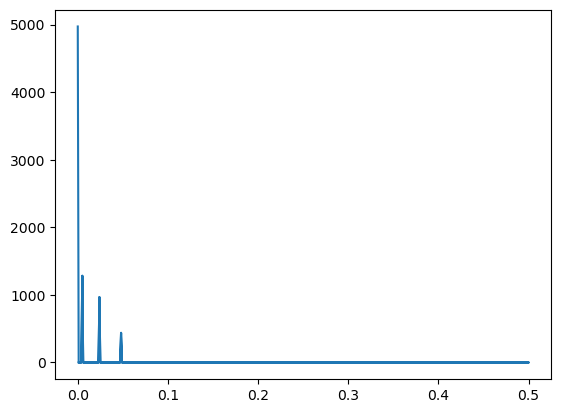

In [27]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [28]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


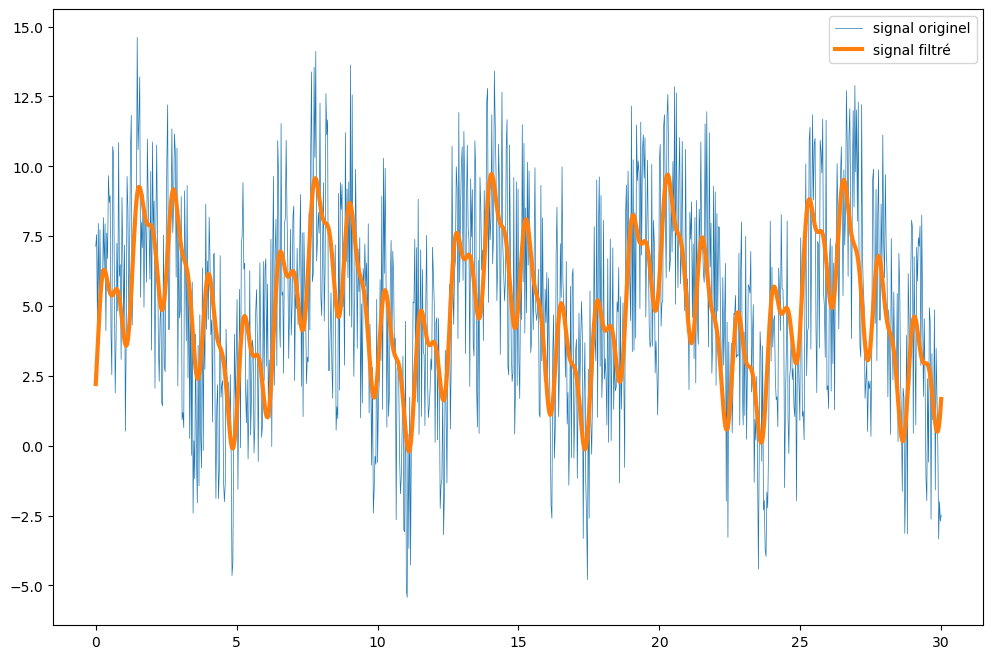

In [29]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()

# TRAITEMENT D'IMAGE

In [30]:
# MORPHOLOGIE 
# 02 types d'opérations : Dilation , Erosion

In [31]:
# On peut les utiliser pour retirer des sartefactss sur une image
from scipy import ndimage

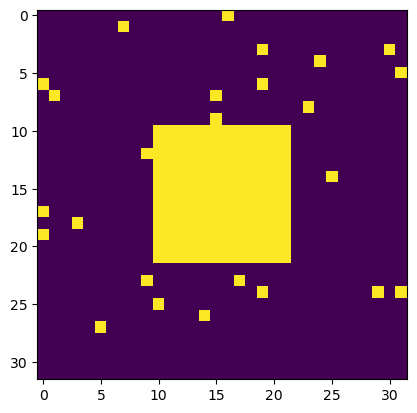

In [32]:
np.random.seed(0)
X=np.zeros((32,32))
X[10:-10, 10:-10]=1
X[np.random.randint(0,32,30), np.random.randint(0,32,30)]=1
plt.imshow(X)

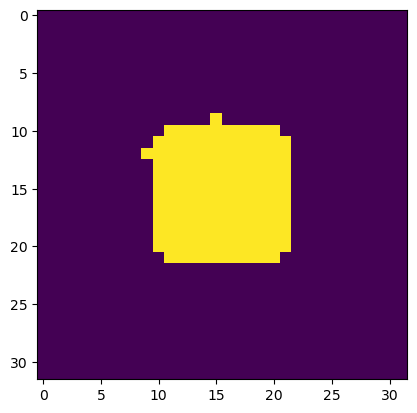

In [33]:
open_x=ndimage.binary_opening(X)
plt.imshow(open_x)

(507, 537)

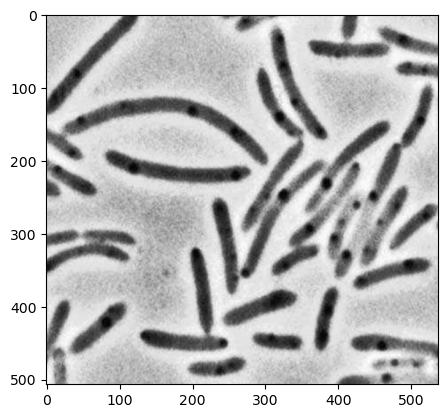

In [34]:
# importer l'image avec pyplot
image = plt.imread('bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

In [35]:
# extraire les bacteries de l'arrière plan 
# utiliser les techniques demorphologies pour enlever les artefacts 
# mesurer la taille de chacune des images 

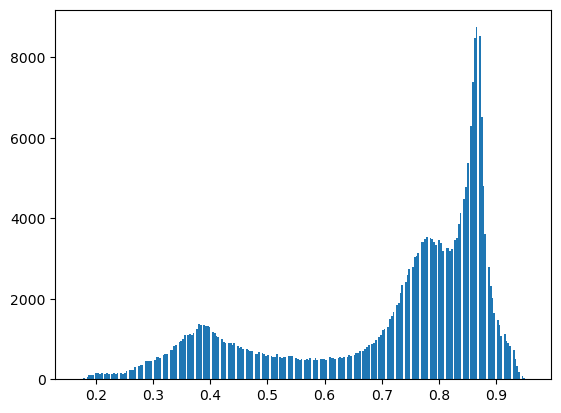

In [36]:
#1ère étape : extraire les pixels les plus sombres

image_2=np.copy(image)
plt.hist(image_2.ravel(),bins=255)
plt.show()

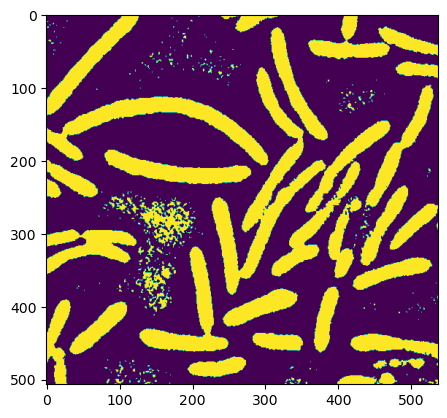

In [37]:
image=image<0.7
plt.imshow(image)

In [38]:
# 2ème ëtape 
label_image, n_labels=ndimage.label(image)
print(n_labels)

384


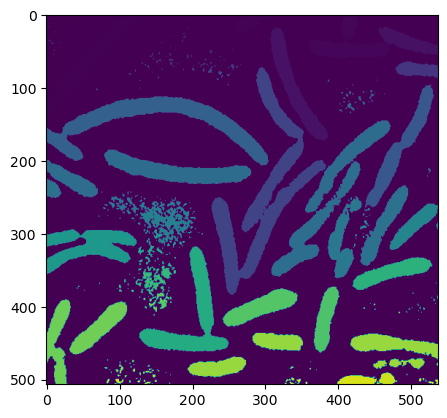

In [39]:
plt.imshow(label_image)

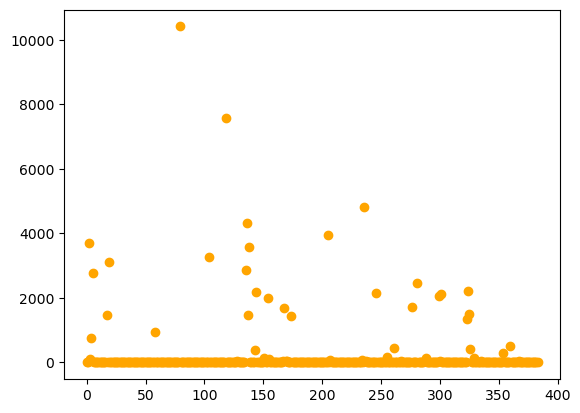

In [40]:
ndimage.sum(image, label_image, range(n_labels)sizes)
plt.scatter(range(n_labels),sizes,c="orange")

In [45]:
# pour compter la taille de chaque bactérie
sizes=ndimage.sum(image, label_image, range(n_labels))
sizes

array([0.0000e+00, 3.0000e+00, 3.6950e+03, 1.2100e+02, 7.5500e+02,
       2.7700e+03, 2.0000e+00, 1.0000e+00, 5.0000e+00, 2.0000e+00,
       1.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00,
       8.0000e+00, 3.0000e+00, 1.4570e+03, 1.0000e+00, 3.1000e+03,
       3.0000e+00, 2.0000e+00, 2.0000e+00, 7.0000e+00, 1.0000e+00,
       2.0000e+00, 1.3000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00,
       1.0000e+00, 8.0000e+00, 7.0000e+00, 3.0000e+00, 1.0000e+00,
       7.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
       3.0000e+00, 1.0000e+00, 1.3000e+01, 7.0000e+00, 1.3000e+01,
       2.0000e+00, 7.0000e+00, 1.1000e+01, 4.0000e+00, 2.0000e+00,
       2.0000e+00, 1.0000e+00, 3.0000e+00, 1.4000e+01, 5.0000e+00,
       1.5000e+01, 2.0000e+00, 1.0000e+00, 9.4100e+02, 4.0000e+00,
       1.1000e+01, 2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+01,
       3.0000e+00, 3.0000e+00, 2.1000e+01, 1.0000e+00, 6.0000e+00,
       3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e